# タイタニック号の生存率予測をしよう

応用課題では、実際にタイタニック号のデータを利用して、生存率予測を行います。データ分析コンペでもある、Kaggleでもタイタニック号の生存率予測が出題されているので、Kaggleでも通用する能力を付けていきましょう。

このシートは、Titanic Data Science SolutionsというKaggleのKernelを翻訳したものです。

https://www.kaggle.com/startupsci/titanic-data-science-solutions

## タイタニック号とは？


タイタニック（RMS Titanic）は、20世紀初頭に建造された豪華客船です。
処女航海中の1912年4月14日深夜、北大西洋上で氷山に接触、翌日未明にかけて沈没しました。犠牲者数は乗員乗客合わせて1,513人（他に1,490人、1,517人、1,522〜23人　1609人など様々な説がある）であり、20世紀最大の海難事故でした。タイタニックとその事故は、しばしば映画化されるなどして世界的にその名を知られています。この難破船が生命の喪失につながった原因の1つは、乗客と乗組員に十分な救命艇がなかったことです。沈没を生き延びるには何らかの運があったにもかかわらず、女性、子供、上層階など、他の人よりも生き残る可能性が高いグループもありました。

## 課題の概要

この課題では、どのような人々が生き残る可能性が高いのかを分析してください。特に、機械学習のツールを適用して、どの乗客が悲劇から生き残ったかを予測するようにしてください。

## データセット

訓練データがtrain.csv、テストデータがtest.csvで保存されています。また、以下データセットの詳細です。

* survival:生存したかどうか
   * 0 = No, 1 = Yes
* pclass: Ticket class
   * 1 = 1st, 2 = 2nd, 3 = 3rd
   * 1st = Upper, 2nd = Middle, 3rd = Lower
* sex: 性別
* Age: 年齢
* sibsp: 一緒に乗船していた兄弟、配偶者の数
* parch: 一緒に乗船していた親、子ども、孫の数
* ticket: チケットの乗船番号
* fare: 乗船費用
* cabin: Cabin number
* embarked: 出発した港の名前
   * C = Cherbourg, Q = Queenstown, S = Southampton
   
## ワークフロー

分析は、以下の7つのステージで進めていきます。

1. 明らかにしたい問いや、問題の定義
2. 訓練およびテストデータの取得
3. データの整形、作成、クレンジング
4. パターンの分析、特定、また探索的にデータを分析する
5. 問題のモデル化、予測、解決
6. 問題解決のステップと最終的な解決方法を視覚化、報告
7. 結果の提出

上記のフローが一般的な順序となっていますが、例外もあります。

- 複数のワークフローステージを組み合わせることがあります。
- 提示されたよりも早くステージに到達することもあります。また、同じステージを何度も体験することもあります
- ステージをスキップすることもあります。

では、上記7つのワークフローに沿って進めていきましょう。

## 1.明らかにしたい問いや、課題の定義

Kaggleのようなコンペでは、解決すべき問題や質問する項目を定義し、データサイエンスモデルを訓練するためのデータセットを提供し、テストデータセットに対してモデル結果をテストします。今回の問題は、Kaggleだと以下のように定義されています。

>タイタニック災害から生き残ったまたは生き残っていない乗客を列挙したトレーニングセットを知っていれば、テストデータセット内のこれらの乗客が生存しているかどうかにかかわらず、モデルは生存情報を含まない所定のテストデータセットに基づいて決定できます。

今回の課題は、訓練データから、テストデータの乗客の生存率を予測することを、課題としてすすめていきます。

## ワークフローのゴール

データ科学ソリューションのワークフローは、7つの主要な目標を達成していきます。

**①分類(Classifying)。** : 我々はサンプルを分類またはカテゴリ化したいかもしれない。また、さまざまなクラスとソリューションの目標との関連性や相関性を理解したい場合もあります。

**②相関(Correlating)** :トレーニングデータセット内の利用可能な機能に基づいて問題に近づくことができます。データセット内のどの機能がソリューションの目標に大きく貢献していますか？統計的に言えば、機能とソリューションの目標の間には相関がありますか。特徴量が変化すると、ソリューションの状態も変わりますが、その逆もあります。（※特徴量：各列は、分析に使用できる測定可能なデータである氏名、年齢、性別、料金などを表します。これらがデータセットの特徴量です。）

**③変換(Converting)** :モデリング段階では、データを準備する必要があります。モデルアルゴリズムの選択に応じて、すべての特徴を数値相当の値に変換する必要があるかもしれない。たとえば、テキストのカテゴリ値を数値に変換する場合です。(※テキストをそのまま予測モデルに使うことが難しいので、テキストを二値の数値に変換することはよくあります)

**④補完（Completing）**データの準備では、フィーチャ内の欠損値を見積もる必要があります。モデルアルゴリズムは、欠損値がない場合に最も効果的です。

**⑤修正(Modifying)** :我々はまた、与えられた訓練データセットを、機能内のエラーまたはおそらく無価値の値について分析し、これらの値を是正するか、またはエラーを含むサンプルを除外することができる。これを行うための1つの方法は、サンプルまたはフィーチャの間で異常値を検出することです。分析に貢献していない場合、または結果に著しい歪みが生じている場合、機能を完全に破棄することもあります。

**⑥作成(Creating)** :既存の特徴量または特徴量のセットに基づいて新しい特徴量を作成して、特徴量が相関、変換、補完の目標に従うようにすることができます。

**⑦グラフ作成(Charting)**データの性質とソリューションの目標に応じて適切な視覚化プロットとグラフを選択します。


## ワークフロー ②訓練およびテストデータの取得

それでは、さっそくデータを取得しましょう。最初に各種必要なライブラリをインポートします。

In [292]:
# データ分析や前処理
import pandas as pd
import numpy as np
import random as rnd

# 可視化
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 機械学習
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## データを取得する

Python Pandasパッケージは、私たちのデータセットで作業するのに役立ちます。まず、Pandas DataFramesにトレーニングデータセットとテストデータセットを取得します。また、これらのデータセットを組み合わせて、両方のデータセットで特定の操作を実行します。

ディレクトリ内に、どのようなファイルが存在するのか確かめるために、lsコマンドを実行しますと、train.csvという訓練データと、test.csvというテストデータがあることがわかります。

In [293]:
!ls

Untitled.ipynb	gender_submission.csv  kernel.ipynb  test.csv  train.csv


**課題**
- ①Pandasでtrain.csvを読み込み、train_dfとして変数に格納してください
- ②Pandasでtest.csvを読み込み、train_dfとして変数に格納してください
- ③train_dfと、test_dfを、リスト形式でcombineという変数に格納してください。

In [294]:
#①train_dfとして、train.csvをpandasで読み込みます

#②train_dfとして、train.csvをpandasで読み込みます

#③train_dfと、test_dfを、リスト形式でcombineという変数に格納してください。

**解答**

In [295]:
#①train_dfとして、train.csvをpandasで読み込みます
train_df = pd.read_csv('train.csv')

#②train_dfとして、train.csvをpandasで読み込みます
test_df = pd.read_csv('test.csv')

#③train_dfと、test_dfを、リスト形式でcombineという変数に格納してください。
combine = [train_df, test_df]

## データを記述し分析する

Pandasはまた、プロジェクトの早い段階から、質問に答えるデータセットを記述するのに役立ちます。

**どの特徴量がデータセットで使えるか**

Pandasを使って、どのような特徴量が存在するのか、見てみましょう。まずはtrain_dfの列名を見ることで、特徴量を可視化します。

**課題**
①train_dfの特徴量（＝列名）を出力してください。

In [296]:
#①train_dfの特徴量（＝列名）を出力してください。

In [297]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**どのようなデータが入っているか**

では、train_dfのデータの中身を確認してみましょう。すべて見ると大変なので、先頭20行と、後ろから20行を見てみましょう。

**課題**
- ①train_dfの最初から5行を出力してください。
- ②train_dfの後ろから5行を出力してください。
- ③test_dfの最初から5行を出力してください。
- ④test_dfの後ろから5行を出力してください。


In [298]:
#①train_dfの最初から5行を出力してください。
#②train_dfの後ろから5行を出力してください。
#③test_dfの最初から5行を出力してください。
#④test_dfの後ろから5行を出力してください。

In [299]:
#①train_dfの最初から5行を出力してください。

train_df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [300]:
#②train_dfの後ろから5行を出力してください。

train_df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [301]:
#③test_dfの最初から5行を出力してください。

test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [302]:
#④test_dfの後ろから5行を出力してください。

test_df.tail(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## 特徴量について

ここで、特徴量について見れたかと思います。さて、特徴量について、それぞれ分類してみようと思います。

## 特徴量の分類

特徴量には、カテゴリカルデータ（定性的データ）と、数値データ（定量的データ）が存在します。

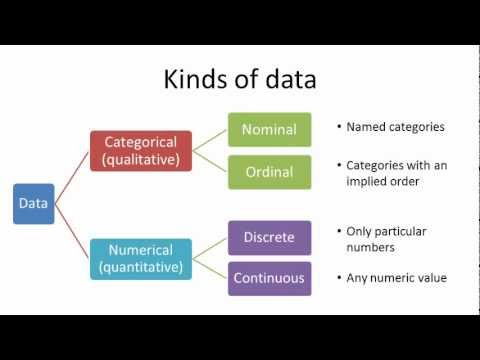


## カテゴリカルデータ

カテゴリカルデータの中には、名義尺度（Norminal Scale）と、順序尺度（Ordinal Scale)があります。

```['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']```
 
**名義データ** 

このタイタニック号のデータセットでいうと、名義尺度はSurvived、Sex、Emberkedとなります。これはただの名前の尺度となっています。例えば、NameだったらWare, Mr. Frederickです。Survivedはものによっては1や0と表記されていますが、もともとはYes, Noで表現できるものとなっていますね。

**順序データ**

順序データは、順番を示すデータとなります。今回のデータでいうと、Pclassが順序データにあたります。

## 数値データ 

数値データの中には、離散データと連続データの2つが存在します。

**離散データ(Discrete Variable)**

離散データ(Discrete Variable)は、SibSp、Parchなどにあたります。

**連続データ(Continuous Variable)**

連続データは、Age, Fareなどにあたります。

## 欠損値の数を数える

各特徴量には、欠損値が含まれている可能性があります。そこで、欠損値を確認してみましょう。

**課題**

- ①train_dfの全ての特徴量を除いた値を、infoメソッドを利用して出力してください。
- ②test_dfの全ての特徴量を除いた値を、infoメソッドを利用して出力してください。


In [303]:
# ①train_dfの全ての特徴量を除いた値を、infoメソッドを利用して出力してください。


In [304]:
# ①train_dfの全ての特徴量を除いた値を、infoメソッドを利用して出力してください。
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [305]:
# ②test_dfの全ての特徴量を除いた値を、infoメソッドを利用して出力してください。

In [306]:
# ②test_dfの全ての特徴量を除いた値を、infoメソッドを利用して出力してください。
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**どの特徴量に欠損値が存在するか**

さて、infoメソッドから出力した値を見てみます。

train_dfのPassangerIdでは、データセットが891個存在することが分かっています。このうち、欠損値が存在するのは、データが714個しかないAgeと、204個しかないCabinと、889個しかないEmbarkedという特徴量だということが分かりました。

```
train_df.info()

PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
```

同様に、test_dfでは、全体が418個のデータなのにたいして、Ageが332、Fareが417、Cabinが91となっていることがわかりました。

```
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
```

これらの欠損値を今後埋めていくことになります。

## データの重複 

訓練データの中に、データの重複がある可能性があります。こちらを確認してみましょう。

```
オブジェクト要素の基本統計量も算出できる
df.describe(include=['O'])
```


**課題**

1. traind_dfにdescribeメソッドを利用して、データの重複を確認してください。

In [307]:
# 1. traind_dfにdescribeメソッドを利用して、データの重複を確認してください。


In [308]:
# 1. traind_dfにdescribeメソッドを利用して、データの重複を確認してください。

train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Danoff, Mr. Yoto",male,347082,G6,S
freq,1,577,7,4,644


## データ分析の方針

これらのデータから、さきほど挙げた7つの目標を達成していこうと思います。

**相関**

Survivalにどのような特徴量が関係しているのか、調査しましょう。

**補完**

Survivalに影響を受けていそうな変数から、優先的にデータの保管をしていきます。まずはAgeのデータがSurvivalに関係していそうなので、補完していく必要性があります。また、Embarkedももしかしたらsurvivalやほかの特徴量に影響を与えている可能性がありますので、補完が必要な可能性がります。

**修正**
    
1. 特徴量として、Ticketは重複率（22％）が高く、Ticketと生存率の間に相関がない可能性があるため、Ticketは分析から除外される可能性があります。
2. Cabinは、トレーニングデータとテストデータセットの両方で非常に不完全であるか、または多くのnull値を含んでいるため、削除される可能性があります。
3. PassengerIdはSurviveに寄与しないため、トレーニングデータセットから削除される可能性があります。
4. Nameの機能は比較的非標準であり、生存に直接貢献しない可能性があります。

**作成**

1. ParchとSibSpに基づいてFamilyという新しい機能を作成し、家族の総数を取得したい場合があります。 
2. Nameを使用して、タイトルを新しい特徴量として抽出することができます。
3. Ageバンドの新しい機能を作成したい場合があります。これは、連続的な数値的特徴を序数的カテゴリー的特徴に変えることができるからです。
4. 分析に役立つ場合は、範囲別のFareを特徴量として作成することもできます。

**分類**

また、前に述べた問題の記述に基づいて、私たちの前提に追加することもあります。

1. 女性（性別=女性）は生存していた可能性が高い。 
2. 子供（年齢<？）は生存していた可能性が高い。 
3. 上位クラスの乗客（Pclass = 1）は生き残った可能性が高い。

## 特徴量をピボットテーブルで分析しよう

私たちの観測と想定を確認するために、特徴量の相互関係を素早く相互にピボットすることで、特徴量の相関関係を素早く分析できます。この段階では空の値を持たない特徴量に対してのみ行うことができます。また、カテゴリ（性別）、順序（Pclass）または離散（SibSp、Parch）タイプの機能に対してのみ、そうすることが理にかなっています。

まず最初に、PclassとSurvivedのピボットテーブルを作成します。

**課題**
1. PclassとSurvivedのピボットテーブルを作成してください。Pclassは1-3までの順序データとなります。それに応じたSurvivedの平均値を算出してください。
2. それぞれのPclassによって、Survivedの平均値が変化するか確認してください。



In [309]:
#1. PclassとSurvivedのピボットテーブルを作成してください。Pclassは1-3までの順序データとなります。それに応じたSurvivedの平均値を算出してください。

In [310]:
#1. PclassとSurvivedのピボットテーブルを作成してください。Pclassは1-3までの順序データとなります。それに応じたSurvivedの平均値を算出してください。

train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


次に、SexとSurvivedのピボットテーブルを作成します。

**課題**
1. SexとSurvivedのピボットテーブルを作成してください。SexはFemale, maleの2つのデータがあります。それに応じたSurvivedの平均値を算出してください。
2. それぞれのSexによって、Survivedの平均値が変化するか確認してください。

In [311]:
#1. SexとSurvivedのピボットテーブルを作成してください。SexはFemale, maleの2つのデータがあります。それに応じたSurvivedの平均値を算出してください。



In [312]:
#1. SexとSurvivedのピボットテーブルを作成してください。SexはFemale, maleの2つのデータがあります。それに応じたSurvivedの平均値を算出してください。

train_df[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


次に、ParchとSurvivedのピボットテーブルを作成します。

**課題**
1. ParchとSurvivedのピボットテーブルを作成してください。Parchは1~8のデータがあります。それに応じたSurvivedの平均値を算出してください。
2. それぞれのParchによって、Survivedの平均値が変化するか確認してください。

In [313]:
#1. ParchとSurvivedのピボットテーブルを作成してください。Parchは1~8のデータがあります。それに応じたSurvivedの平均値を算出してください。


In [314]:
train_df[["Parch", "Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [315]:
次に、SibSpとSurvivedのピボットテーブルを作成します。

**課題**
1. SibSpとSurvivedのピボットテーブルを作成してください。SibSpは1~8のデータがあります。それに応じたSurvivedの平均値を算出してください。
2. それぞれのSibSpによって、Survivedの平均値が変化するか確認してください。

SyntaxError: invalid character in identifier (<ipython-input-315-70359a0f73d5>, line 1)

In [316]:
# 1. SibSpとSurvivedのピボットテーブルを作成してください。SibSpは1~8のデータがあります。それに応じたSurvivedの平均値を算出してください。


In [317]:
# 1. SibSpとSurvivedのピボットテーブルを作成してください。SibSpは1~8のデータがあります。それに応じたSurvivedの平均値を算出してください。

train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


## 分析とネクストアクション

これらのピボットテーブルから、平均値を比較しました。その結果、以下のことが分かりました。

 -  ** Pclass ** PclassとSurvivedの間に有意な相関（> 0.5）が観察される。この特徴量をモデルに含めることにしました。
 -  **Sex** Sex=FemaleのSurvivedが74％で非常に高いということが確認できました。よって、こちらのデータもモデルに含めることにします。
 -  **SibSpとParch** これらの特徴量は、特定の値に対してゼロ相関を有します。これらの個々の特徴量から新しい特徴量、または特徴量のセットを導出することが最善の方法です。



## データを視覚化して解析しよう

今度は、データを分析するための視覚化を使用して、いくつかの前提を確認していきます。


#### 数値データの相関

数値データと目標である相関を理解することから始めましょう。

ヒストグラム(Histgram)チャートは、Ageのような連続的な数値変数を分析するのに便利です。Ageのような範囲が有用なパターンを持つ場合に、その範囲を特定するのに役立ちます。

ヒストグラムは、自動的に定義されたビンまたは等間隔のバンドを使用したサンプルの分布を示すことができます。これは、特定の範囲に関係する質問に答えるのに役立ちます（例えば、Ageを範囲で分割することで、「幼児の生存率はより良いですか？」という問いに答えることができます。）

ヒストグラム視覚化におけるx軸は、サンプルまたは乗客の数を表すことに注意してください。

**課題**

1. Ageをヒストグラムを利用して可視化してください。
2. AgeをSurvived=0の場合で死亡者の年齢をヒストグラムで可視化してください。
3. AgeをSurvived=1の場合で生存者の年齢をヒストグラムで可視化してください。

In [318]:
#1. Ageをヒストグラムを利用して可視化してください。
#2. AgeをSurvived=0の場合で可視化してください。
#3. AgeをSurvived=1の場合で可視化してください。

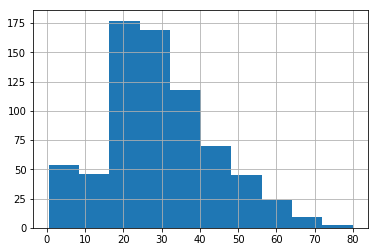

In [319]:
#1. Ageをヒストグラムを利用して可視化してください。
train_df["Age"].hist()

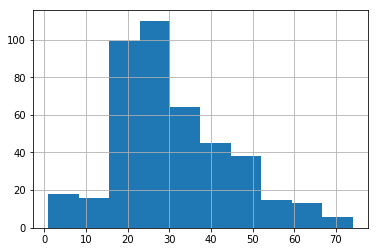

In [320]:
#2. AgeをSurvived=0の場合で可視化してください。
train_df[train_df["Survived"]==0]["Age"].hist()

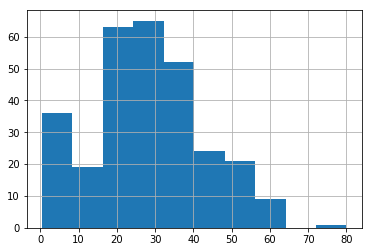

In [321]:
#3. AgeをSurvived=1の場合で可視化してください。

train_df[train_df["Survived"]==1]["Age"].hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f56e8c1a780>,
      dtype=object)

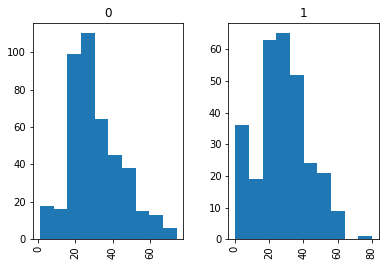

In [322]:
# 補足 histメソッドのパラメーターでbyを指定すると簡単に比較できます。

train_df["Age"].hist(by=train_df["Survived"])

**結果**

 - 幼児（年齢= 4歳）は高い生存率を示しました。
 - 最も古い乗客（年齢= 80）が生き残った。
 -  15-25歳の多数が生き残れませんでした。
 - ほとんどの乗客は15-35歳の範囲にあります。
 
 
 **NEXT ACTION**
 

 この単純な分析により、後続のワークフローステージの決定として、以下の意思決定をおこないます。
 
 1. 学習データでは、Ageを考慮する必要があります。
 2. 1の理由から、AgeのNullを補完します。
 3. 私たちはAgeの範囲を示した特徴量を作成するべきです。

### 数値データと順序データの特徴の相関

今度は、数値データと順序データの相関をみてきます。

**課題1**

1. 死亡者(Survived=0)で、PclassごとにAgeでヒストグラムを作成してください。
2. 生存者(Suvived=1)で、PclassごとにAgeでヒストグラムを作成してください。

In [323]:
#1. 死亡者(Survived=0)で、PclassごとにAgeでヒストグラムを作成してください。



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56e8c0f470>,
      dtype=object)

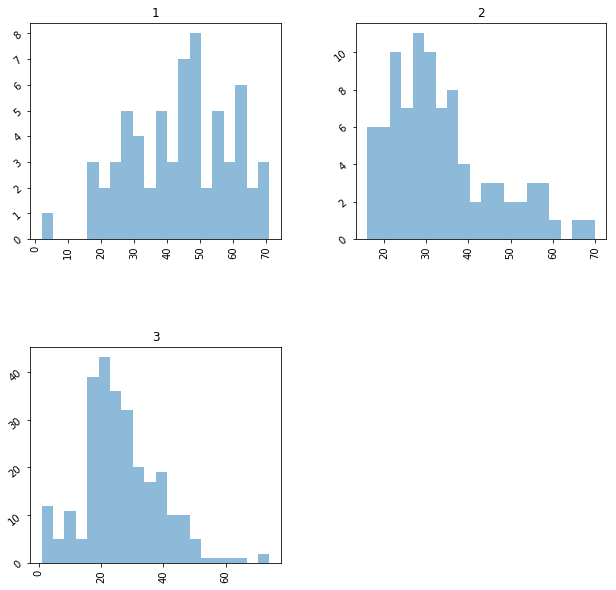

In [324]:
#2. 生存者(Suvived=0)で、PclassごとにAgeでヒストグラムを作成してください。

train_df[train_df["Survived"]==0]["Age"].hist(by=train_df["Pclass"],figsize=(10,10),bins=20,alpha=.5,yrot=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56e8b44470>,
      dtype=object)

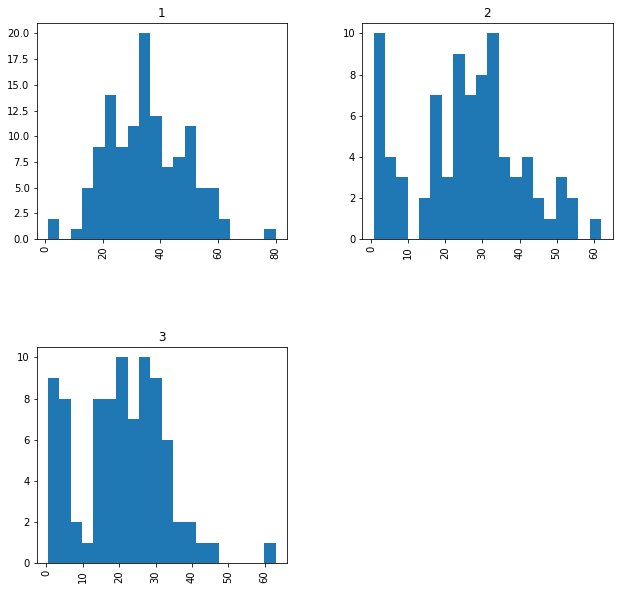

In [325]:
#. 生存者(Survived=1)で、PclassごとにAgeでヒストグラムを作成してください。

train_df[train_df["Survived"]==1]["Age"].hist(by=train_df["Pclass"],figsize=(10,10),bins=20)

/home/kdmgs110/.local/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


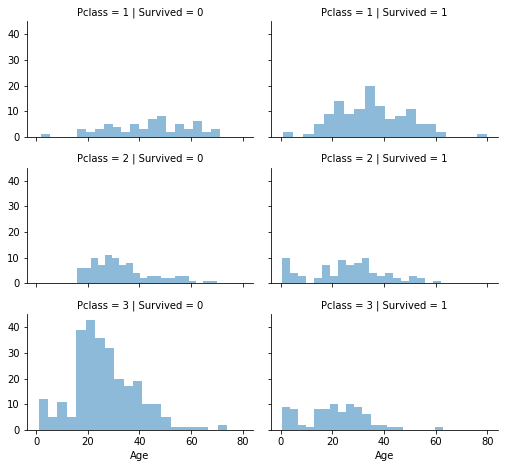

In [326]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**結果**

 -  Pclass = 3がほとんどの乗客を持っていたが、ほとんどは生き残れませんでした。分類の仮定＃2を確認します。
 -  Pclass = 2およびPclass = 3の幼児の乗客はほとんどが生き残りました。さらに、我々の分類する仮定＃2を満たす。
 -  Pclass = 1のほとんどの乗客は生き残った。私たちの分類の仮定＃3を確認します。
 -  Pclassは、乗客の年齢分布によって異なります。

**決定。**

 - モデルの特徴量にPclassを検討します。

### カテゴリデータの相関

カテゴリデータ間の相関を確認します。

**課題**



/home/kdmgs110/.local/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/kdmgs110/.local/lib/python3.5/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/kdmgs110/.local/lib/python3.5/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/kdmgs110/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[in

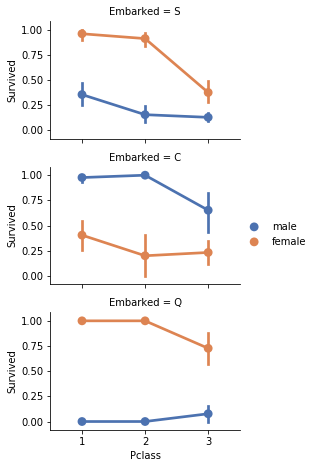

In [327]:
# grid = sns.FacetGrid(train_df, col='Embarked')
# https://qiita.com/dodo5522/items/bfcdb52051154e0cc036

grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

**結果**

 - 女性の乗客は男性よりもはるかに良好な生存率を示した。分類を確認します（＃1）。
 - 男性の生存率が高いEmbarked = Cの例外。これは、PclassとEmbarkedとの間の相関性であり、Pclass and Survivedであり、必ずしもEmbarkedとSurvivedの間の直接的な相関関係ではない。
 -  CおよびQポートでPclass = 2と比較した場合、男性はPclass = 3でより良い生存率を示した。完了（＃2）。
 - 乗船港は、Pclass = 3および男性乗客の生存率が異なる。相関（＃1）。

**決定。**

 - モデルトレーニングにSexを追加します。
 - モデルトレーニングにEmbarked追加します。

### カテゴリと数値の相関

また、カテゴリデータと数値データを関連付けることもできます。私たちは、Emberked（カテゴリーデータで非数値）、Sex（カテゴリーデータで非数値）、Fare（数値データで連続）、Suvived（カテゴリカルデータで数値）と相関させることを検討できます。

**課題**

1. Emberkedごとにグラフを描画して、SexごとにFareの平均値を算出し棒グラフを作成してください。


/home/kdmgs110/.local/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/kdmgs110/.local/lib/python3.5/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


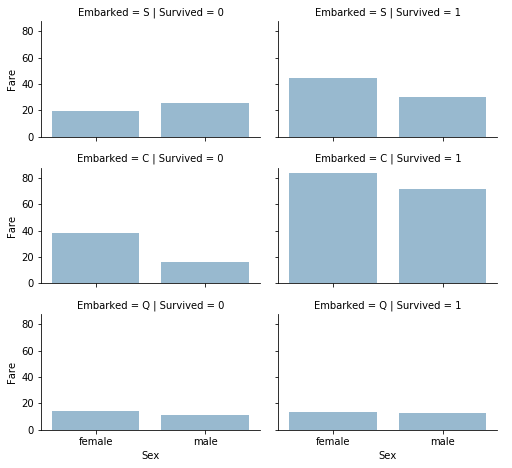

In [328]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## データの整形

データセット課題の解決方法に関するいくつかの前提を集め、意思決定を行いました。これまでは、単一の特徴量や値を変更してこれらの意思決定を行うことはありませんでした。データを修正、作成、補完し、さきほどの意思決定と実行します。

### 特徴量を削除することで修正する

最初に実行するのによい目標です。です。特徴量を削除することで、データの数が減少します。私たちのノートブックをスピードアップし、分析を楽にしましょう。

私たちの前提と決定に基づいて、Cabin（＃2の修正）とTicket（＃1の修正）の特徴量を削除したいと考えています。

該当する場合は、訓練データセットとテストデータセットの両方で操作を実行して、一貫性を保ちます。

**課題**
1. 現状のtrain_dfの行数と列数を確認してください。
2. 現状のtest_dfの行数と列数を確認してください。


In [329]:
print ("-"*25+ "Before"+ "-"*25)

# 1. 現状のtrain_dfの行数と列数を確認してください。
print ("train_df:{}".format(train_df.shape))

# 2. 現状のtest_dfの行数と列数を確認してください。
print ("test_df:{}".format(test_df.shape))

-------------------------Before-------------------------
train_df:(891, 12)
test_df:(418, 11)


**課題**
1. train_dfから、TicketとCabinの特徴量を削除してください
2. test_dfから、TicketとCabinの特徴量を削除してください
3. train_dfの行数と列数を確認してください
4. test_dfの行数と列数を確認してください


In [330]:
#1. train_dfから、TicketとCabinの特徴量を削除してください
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)

#2. test_dfから、TicketとCabinの特徴量を削除してください
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

print ("-"*25+ "After"+ "-"*25)

#3. 現状のtrain_dfの行数と列数を確認してください。
print ("train_df:{}".format(train_df.shape))

# 4. 現状のtest_dfの行数と列数を確認してください。
print ("test_df:{}".format(test_df.shape))

-------------------------After-------------------------
train_df:(891, 10)
test_df:(418, 9)


### 既存の特徴量から新しい特徴量を作成する

私たちはNameとPassengerIdの特徴量を削除する前に、称号(title)とSurvivedの相関関係をテストするように設計できるかどうかを分析したいです。乗員の名前には、性別、肩書を示す称号がついています。例えば、Mrs,Dr, Mr, Master等。

次のコードでは、正規表現を使用してTitleという特徴量を抽出します。 RegExパターン `（\ w + \。）`は、Name内のドット文字で終わる最初の単語と一致します。 `expand = False`フラグはDataFrameを返します。

先に事前準備を行います。
train_dfとtest_dfを一つのリストに格納して、一気に処理できるようにします。

**課題**
1. train_dfとtest_dfをcombineというリストに格納してください。

In [331]:
#1. train_dfとtest_dfをcombineというリストに格納してください。


In [332]:
#1. train_dfとtest_dfをcombineというリストに格納してください。
combine = [train_df, test_df]

**課題**

1. train_dfとtest_dfそれぞれに対して、Titleという新しい特徴量の中に、ドット(.)より前の称号を格納してください。
2. SexとTitleでクロス集計をしてください。クロス集計はcrosstabを利用するとできます。
https://note.nkmk.me/python-pandas-crosstab/



In [333]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Master,	Mr, Miss, Mrsなどの敬称が存在することが分かりました。

**課題**

1. train_df, test_dfのTitleで、'Lady', 'Countess','Capt', 'Col',　'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'以外の項目に関しては'Rare'に書き換えて下さい。

2. 同様に、MileはMissに書き換えてください。

3. MmeはMrsに書き換えてください。

4. TitleとSurvivedで、Titleで集計してSurvivedの平均値を算出してください。

In [334]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


これらの敬称を、予測モデルにしやすいように順序データに変換します。

**課題**

1. train_dfとtest_dfで、{"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}に変換してください。

2. train_dfで最初の先頭行を出力してください。

In [335]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset["Title"] = dataset["Title"] .map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
    dataset['Title'] = dataset['Title'].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


最後に、NameとPassengerIdを削除します。

**課題**
1. NameとPassangerIdをtrain_dfから削除してください。
2. Nameをtest_dfから削除してくだｓだい。


In [336]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

# カテゴリデータの変換

同様に、カテゴリカルデータを2値データに変換します。

**課題**

1. Sexをfemale=1, male=-0に変換してください。

In [337]:
#1 Sexをfemale=1, male=-0に変換してください。

In [338]:
#1 Sexをfemale=1, male=-0に変換してください。

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


## 連続的(continuous)な数値データを補完する

今度は、欠損値またはNull値を持つ特徴量を推定して完成させる必要があります。まず、Ageを見ていきましょう。

連続的な数値データを補完するには、3つの方法を検討できます。

①平均と[標準偏差]（https://en.wikipedia.org/wiki/Standard_deviation）の間に乱数を生成する方法

②欠損値を推測するより正確な方法は、他の相関フィーチャを使用することです。我々のケースでは、年齢、性別、およびPクラスの間の相関を記録する。 PclassとGenderの機能の組み合わせのセット全体で[年齢]の[median]（https://en.wikipedia.org/wiki/Median）値を使用してAgeの値を推測します。したがって、Pclass = 1、Gender = 0、Pclass = 1、Gender = 1などの中間年齢など

③1と2を組み合わせる方法です。そのため、中央値(median)に基づいてAgeを推測する代わりに、PclassとGenderの組み合わせのセットに基づいて平均と標準偏差の間の乱数を使用します。




/home/kdmgs110/.local/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


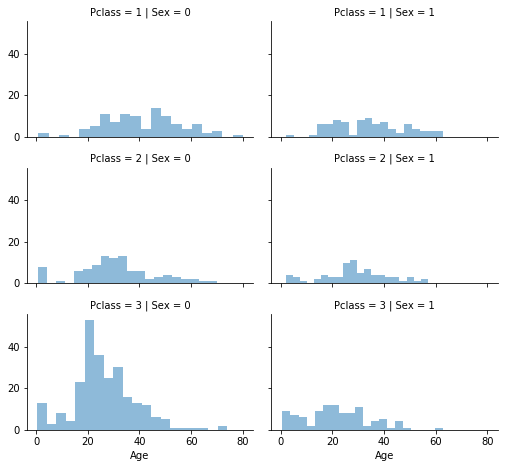

In [339]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Pclass x Genderの組み合わせに基づいて推測されたAge値を含む空の配列を準備することから始めましょう。

**課題**

1. 補完してください。

In [340]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [341]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


次に、Ageを5階層にわけたAgeBandという特徴量を作成します。

**課題**



In [342]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


AgeBandを順序データに置き換えます。

**課題**



In [343]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


AgeBandはもう使わないので削除します。

**課題**


In [344]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


## 既存の特徴量を組み合わせて新しい特徴量を作成する

ParchとSibSpを組み合わせたFamilySizeの新しい特徴量として作成できます。これにより、データセットからParchとSibSpを削除できます。

**課題**

1. ParchとSibSpを足し合わせた、FamilySizeという特徴量を新規に作成してください。
2. FamilySizeとSurvivedの平均値をグループで集計してください。

In [345]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


次に、isAloneという新しい特徴量を作成します。

**課題**
1. IsAloneという特徴量を全て0として作成してください。
2. FamilySizeが1の時、isAloneを1にしてください。
3. isAloneとSurvivedをグループ集計して、Survivedの平均値を出力してください。

In [346]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Parch、SibSp、およびFamilySizeを削除します。

**課題**
1. Parch、SibSp、およびFamilySizeを削除します。

In [347]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


PclassとAgeを組み合わせた人工的な特徴を作成することもできます。Age*Classという変数を作成します。

**課題**


In [348]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.


### カテゴリデータを補完する

Embarkedは、乗車港に基づいてS、Q、Cの値を取りあｍす。トレーニングデータセットには2つの欠損値があります。補完の方法に関しては、最も一般的な出現でこれらを記入するだけです。

**課題**

1. Embarkedでnaを削除し、さらにもっとも出てくる値（最頻値、mode）をfreq_portに格納してください。
2. それを出力してください。


In [349]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

**課題**

1. train_csvとtest.csvの欠損値を、freq_portに置き換えてください。

In [350]:
# 1. train_csvとtest.csvの欠損値を、freq_portに置き換えてください。

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


## カテゴリカルデータを数値データに変換する

**課題**

1. Embarkedを{'S': 0, 'C': 1, 'Q': 2}に置き換えて下さい。

In [351]:
# 1. Embarkedを{'S': 0, 'C': 1, 'Q': 2}に置き換えて下さい。

In [352]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


## 数値データの補完

test_dfには、たった一つだけfareに欠損値が存在します。この欠損値に、medianを代入します。


In [353]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null int64
Title          418 non-null int64
IsAlone        418 non-null int64
Age*Class      418 non-null int64
dtypes: float64(1), int64(8)
memory usage: 29.5 KB


**課題**
1. test_dfのFareの欠損値を、Fareのmedianで埋めてください。
2. それを出力してください。

In [354]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


# 
fareを4つに分けます。

**課題**



In [355]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


**課題**

4つのカテゴリに数値化してください。

In [356]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


## モデル、予測、解決

これで、訓練データから学習しモデルをし、必要なソリューションを予測する準備が整いました。 60以上の予測モデリングアルゴリズムがあります。評価できるいくつかの選択されたモデルに絞るためには、問題の種類と解決策の要件を理解する必要があります。


私たちの問題は、分類と回帰の問題です。他の変数や特徴（性別、年齢、ポートなど）との関係（生存しているか否か）を特定したい。私たちは、与えられたデータセットでモデルを訓練しているので、教師あり学習と呼ばれる機械学習のカテゴリーにも通っています。これらの2つの基準（教師あり学習と分類と回帰）では、モデルの選択肢をいくつかに絞り込むことができます。これらには、以下のモデルが存在します。

 - ロジスティック回帰
 -  KNNまたはk-Nearest Neighbors
 - サポートベクターマシン
 - ナイーブベイズ分類器
 - 決定木
 - ランダムフォレスト
 - パーセプトロン
- 人工ニューラルネットワーク
 -  RVMまたは関連性ベクトルマシン
 
 
さっそく、データを準備しましょう。

**課題**

1. X_trainには、Survivedを除いたtrain_dfを代入してください。
2. Y_trainには、Survivedのみが入ったtrain_dfを代入してください。
3. X_testには、PassengerIdを除いたtest_dfを代入してください。
4. X_train、Y_train、X_testの行数、列数を出力してください。

In [357]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

## ロジスティック回帰

ロジスティック回帰は、ワークフローの早期に実行するのに便利なモデルです。ロジスティック回帰は、累積ロジスティック分布であるロジスティック関数を使用して確率を推定することによって、従属変数（目的変数）と1つ以上の独立変数（説明変数）との間の関係を測定することができます。
http://ailaby.com/logistic_reg/


In [361]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

ロジスティック回帰を使用して、特徴量の作成と目標達成のための前提と決定を検証できます。これは、決定関数内の特徴の係数を計算することによって行うことができます。

正の係数は応答の対数 - オッズを増加させ（したがって確率を増加させる）、負の係数は応答の対数 - オッズを減少させる（したがって確率を減少させる）。

**課題**
1. 特徴量ごとに、相関係数を算出してください。

In [363]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201527
5,Title,0.398234
2,Age,0.287163
4,Embarked,0.261762
6,IsAlone,0.129140
3,Fare,-0.085150
7,Age*Class,-0.311200
0,Pclass,-0.749007


**結果**

- Sexが最も高い正の係数で、性別の値が増加する（男性：0〜女性：1）ことを意味し、生存確率= 1が最も高くなります。
- 逆にPclassが増加すると、Survived = 1の確率が最も低下します。
- Age * Classは、Survivedと2番目に高い負の相関関係を持つため、モデル化するのに適した人工的な機能です。
- Titleが2番目に高い正の相関関係になります。

## SVM サポートベクターマシン

次に、分類および回帰分析に使用されるデータを分析する関連する学習アルゴリズムを備えた教師あり学習モデルであるサポートベクターマシン(SVM)を使用してモデル化します。 2つのカテゴリのいずれかに属するとマークされた一連のトレーニングサンプルが与えられた場合、SVMトレーニングアルゴリズムは新しいテストサンプルをあるカテゴリまたは他のカテゴリに割り当てるモデルを構築し、確率的ではないバイナリにします線形分類器。参照[Wikipedia]

**課題**
1. SVCを利用して、予測値を出してください。

In [364]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.84

## k-Nearest Neighborsアルゴリズム(k近傍法)

パターン認識において、k-Nearest Neighborsアルゴリズム（または略してk-NN）は、分類および回帰に使用される非パラメトリックな方法である。サンプルは、その近隣のものの多数決によって分類され、そのサンプルは、k個の最近傍（kは正の整数、通常は小さい）の中で最も一般的なクラスに割り当てられる。 k = 1の場合、オブジェクトはその単一の最近傍のクラスに単純に割り当てられます。

**課題**
1. k近傍法を利用して、予測値を算出してください。

In [365]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

## ナイーブベイズ分類

機械学習では、ナイーブベイズ分類子は、ベイズの定理に特徴間の強い（素朴な）独立性仮定を適用した単純な確率的分類子のファミリーです。 Naive Bayes分類器はスケーラビリティが高く、学習問題の変数（フィーチャ）数に線形のパラメータが必要です。参考文献[Wikipedia]（https://en.wikipedia.org/wiki/Naive_Bayes_classifier）。

In [366]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

## パーセプトロン

パーセプトロンは、バイナリ分類器（数字のベクトルで表される入力が特定のクラスに属するかどうかを決定する関数）の教師付き学習のアルゴリズムです。線形分類器の一種であり、線形予測器関数に基づいて予測を行い、重みの組を特徴ベクトルと組み合わせる分類アルゴリズムである。このアルゴリズムはオンライン学習を可能にし、訓練セット内の要素を一度に1つずつ処理する。参考文献[Wikipedia]（https://en.wikipedia.org/wiki/Perceptron）

In [368]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


78.0

## 線形サポートベクターマシン(Liner Support Vector Machine)


https://qiita.com/rennnosuke/items/cd01aa855196340167df

In [369]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.01

## 確率的勾配降下法 

確率的勾配降下法（かくりつてきこうばいこうかほう、英: stochastic gradient descent, SGD）とは、連続最適化問題に対する勾配法の乱択アルゴリズム。目的関数が、微分可能な和の形である事が必要。バッチ学習である最急降下法をオンライン学習に改良した物。

https://ja.wikipedia.org/wiki/%E7%A2%BA%E7%8E%87%E7%9A%84%E5%8B%BE%E9%85%8D%E9%99%8D%E4%B8%8B%E6%B3%95

In [370]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


71.72

## 決定木

このモデルでは、フィーチャ（ツリーブランチ）をターゲット値（ツリーの葉）に関する結論にマッピングする予測モデルとして決定木を使用します。ターゲット変数が有限の値セットを取ることができるツリーモデルは、分類ツリーと呼ばれます。これらの木構造では、葉はクラスラベルを表し、枝はそれらのクラスラベルにつながる特徴の接続詞を表す。ターゲット変数が連続した値（通常は実数）を取ることができるディシジョンツリーは、回帰ツリーと呼ばれます。
モデル信頼スコアはこれまでに評価されたモデルの中で最も高いです。



In [372]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

## ランダムフォレスト

次のモデルのランダムフォレストは最も人気のあるものの1つです。ランダムフォレストまたはランダム決定フォレストは、トレーニング時に多数の決定木（n_estimators = 100）を構築し、クラス（分類）のモードであるクラスを出力することによって動作する、分類、回帰および他のタスクのアンサンブル学習方法であり、または個々の樹木の平均予測（回帰）を含む。参照[Wikipedia]（https://en.wikipedia.org/wiki/Random_forest）。

モデル信頼スコアはこれまでに評価されたモデルの中で最も高い。このモデルの出力（Y_pred）を使用して、競争結果の提出を作成します。

In [373]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

### モデル評価

すべてのモデルの評価をランク付けして、問題のために最良のモデルを選びます。

Decision TreeとRandom Forestのスコアは同じですが、Random Forestを使用することに決めました。決定木がトレーニングセットにあふれてしまう習慣を修正するためです。

In [374]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
0,Support Vector Machines,83.84
2,Logistic Regression,80.36
7,Linear SVC,79.01
5,Perceptron,78.00
4,Naive Bayes,72.28
6,Stochastic Gradient Decent,71.72


## 結果

Decision TreeとRandom Forestのスコアは同じですが、Random Forestを使用することに決めました。決定木がトレーニングセットにあふれてしまう習慣を修正するためです。

最後に、このモデルを提出します。

In [376]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)

## TODO

- Matplotlibのライブラリを使って、データの可視化を行う
- モデル作成のところの説明を追加する
- 課題をもう少し作る
- もう少し図を入れてわかりやすくする